# KNN - K Nearest Neighbours Modeli 

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# outcome= 1  diabet 
# outcome=0  sağlıklı

data = pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


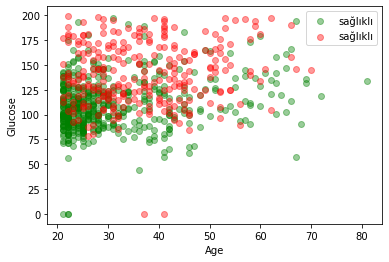

In [48]:
seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar =data[data.Outcome == 0]

plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose, color='green',label="sağlıklı",alpha = 0.4)
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose, color='red',label="sağlıklı",alpha = 0.4)

plt.xlabel("Age")
plt.ylabel("Glucose")

plt.legend()
plt.show()

In [49]:
# x ve y eksenlerini belirleyelim 
y = data.iloc[:,-1].values #hasta mı değil mi 
x_ham_veri = data.drop(["Outcome"],axis = 1) 
#outcome sütünunu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
#çünkü KNN algoritması x değerleri içerisinde gruplandırma yapacak


# normalizasyon yapıyoruz x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz 
#Eğer bu şekilde normalizasyon yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN aalgoritmasını yanıltabilir
x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri) - np.min(x_ham_veri))

#önce 
print("normalizasyon öncesi veriler: \n")
print(x_ham_veri.head())

#sonra 
print("\n \nnormalizasyon sonrası veriler: \n")
print(x.head())



normalizasyon öncesi veriler: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

 
normalizasyon sonrası veriler: 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000 

In [51]:

#train datamız ile test datamızı ayırıyoruz
#train  datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak 
#dest datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıkı insanları ayırt edebiliyor mu diye 
#test etmek için kullanılacak...
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.1,random_state=1)

#knn modelimizi oluşturuyoruz
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbours = k
knn.fit(x_train,y_train)                    #uydur ayarla eğit
prediction = knn .predict(x_test)
print(" k = 3 için Test verimizin doğrulama testi sonucu ",knn.score(x_test,y_test))


 k = 3 için Test verimizin doğrulama testi sonucu  0.8311688311688312


In [52]:



#k kaç olmalı ?
#en iyi k değerini belirleyelim..
sayac = 1 
for k in range (1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print (sayac, "  ","Doğruluk oranı : %", knn_yeni.score(x_test,y_test)*100)
    
    sayac = sayac +1 


1    Doğruluk oranı : % 71.42857142857143
2    Doğruluk oranı : % 71.42857142857143
3    Doğruluk oranı : % 83.11688311688312
4    Doğruluk oranı : % 80.51948051948052
5    Doğruluk oranı : % 81.81818181818183
6    Doğruluk oranı : % 83.11688311688312
7    Doğruluk oranı : % 80.51948051948052
8    Doğruluk oranı : % 80.51948051948052
9    Doğruluk oranı : % 79.22077922077922
10    Doğruluk oranı : % 79.22077922077922
